<a href="https://colab.research.google.com/github/badhri123/Convolutional-Autoencoder_MNIST/blob/master/Convolutional_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch torchvision

In [0]:
import matplotlib.pyplot as plt
import numpy
import scipy.ndimage
import torch 
import torchvision
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import copy

In [0]:

epoch = 10
batch_size =1000
learning_rate = 0.005

# Download Data

mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test  = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

# Set Data Loader(input pipeline)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)

In [0]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,32,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,32,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.Conv2d(64,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.Conv2d(128,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
encoder = Encoder()

In [0]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,128,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.ConvTranspose2d(64,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,32,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,1,3,2,1,1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

decoder = Decoder()

In [0]:

# Noise 

#noise = torch.rand(batch_size,1,28,28)


In [0]:
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [0]:
def crop(i):
  i[:,:,10:20,10:20] = numpy.zeros((10,10))[:]
  return i


(1000, 1, 28, 28)


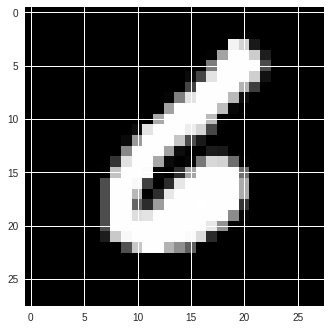

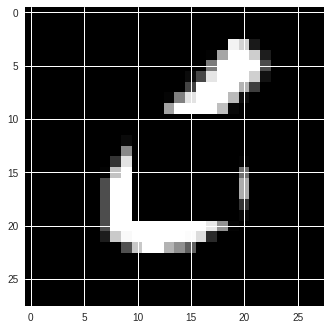

In [0]:
for image,label in train_loader:
  
  image_n = copy.copy(image.data.numpy())
  print(image_n.shape)
  image_n[:,:,10:20,10:20]=numpy.zeros((10,10))
  image_n = torch.from_numpy(image_n) 
  plt.imshow(image[0][0].data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(image_n[0][0],cmap='gray')
  
  break

In [0]:

# train encoder and decoder
# save and load model
for i in range(epoch):
  
  k=0
  for image,label in train_loader:
        
        #image_n = torch.mul(image+0.25, 0.1 * noise)
        #image_n =  torch.from_numpy(scipy.ndimage.filters.gaussian_filter(image,0.8))
       
        image_n = copy.copy(image.data.numpy())
        image_n[:,:,10:20,10:20] = numpy.zeros((10,10))
        image_n=torch.from_numpy(image_n)
        image = Variable(image)
        image_n = Variable(image_n)
        #label = Variable(label.float()).cuda()
        optimizer.zero_grad()
        output = encoder(image_n)
        output = decoder(output)
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()
        print(k)
        print(loss)
        k=k+1
  print("Epoch"+ str(i))

  

0
tensor(0.0998, grad_fn=<MseLossBackward>)
1
tensor(0.0954, grad_fn=<MseLossBackward>)
2
tensor(0.0947, grad_fn=<MseLossBackward>)
3
tensor(0.0919, grad_fn=<MseLossBackward>)
4
tensor(0.0941, grad_fn=<MseLossBackward>)
5
tensor(0.0930, grad_fn=<MseLossBackward>)
6
tensor(0.0918, grad_fn=<MseLossBackward>)
7
tensor(0.0926, grad_fn=<MseLossBackward>)
8
tensor(0.0919, grad_fn=<MseLossBackward>)
9
tensor(0.0912, grad_fn=<MseLossBackward>)
10
tensor(0.0915, grad_fn=<MseLossBackward>)
11
tensor(0.0901, grad_fn=<MseLossBackward>)
12
tensor(0.0907, grad_fn=<MseLossBackward>)
13
tensor(0.0912, grad_fn=<MseLossBackward>)
14
tensor(0.0896, grad_fn=<MseLossBackward>)
15
tensor(0.0911, grad_fn=<MseLossBackward>)
16
tensor(0.0899, grad_fn=<MseLossBackward>)
17
tensor(0.0897, grad_fn=<MseLossBackward>)
18
tensor(0.0866, grad_fn=<MseLossBackward>)
19
tensor(0.0846, grad_fn=<MseLossBackward>)
20
tensor(0.0845, grad_fn=<MseLossBackward>)
21
tensor(0.0853, grad_fn=<MseLossBackward>)
22
tensor(0.0850, gr

KeyboardInterrupt: ignored

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,batch_size=batch_size,shuffle=True)

In [0]:
for image,label in test_loader:
        #image_n = torch.from_numpy(scipy.ndimage.filters.gaussian_filter(image,0.8))
        image_n = copy.copy(image.data.numpy())
        r= numpy.random.randint(1,18)
        image_n[:,:,r:r+10,r:r+10] = numpy.zeros((10,10))
        image_n = torch.from_numpy(image_n)
       
        image = Variable(image)
        image_n = Variable(image_n)
        #label = Variable(label.float()).cuda()
        
        output = encoder(image_n)
        output = decoder(output)
        print(output.size())
        break
        

        

        
        

torch.Size([1000, 1, 28, 28])


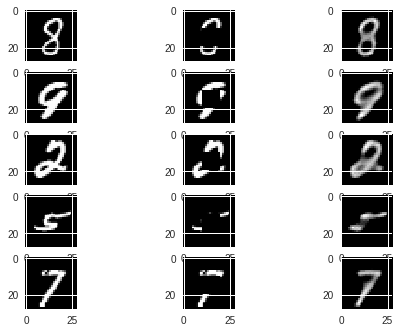

In [0]:



f, axarr = plt.subplots(5,3)

for i in range(5):
  img=image[i+100].cpu()
  imgn=image_n[i+100].cpu()
  out=output[i+100].cpu()
  origin = img.data.numpy()
  noised = imgn.data.numpy()
  outpt = out.data.numpy()
  
  axarr[i,0].imshow(origin[0],cmap='gray')
  axarr[i,1].imshow(noised[0],cmap='gray')
  axarr[i,2].imshow(outpt[0],cmap='gray')














In [0]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


torch.Size([100, 1, 28, 28])


torch.Size([3, 302, 302])

AttributeError: ignored